ImportError: No module named 'py35'

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis

In [68]:
#API_BASE = 'https://www.bitmex.com/api/v1/'
connector = bitmex.BitMEX(base_url=API_BASE,apiKey=API_KEY,apiSecret=API_SECRET)

#connector = bitmex.BitMEX(base_url=API_BASE)

def GetOrderBookPrice():
    queryL2 = {
    'symbol': 'XBTUSD',
    'depth' : 1,
    }

    dataL2 = pd.DataFrame(connector._curl_bitmex(path="orderbook/L2", verb="GET", query=queryL2, timeout=5))
    BuySide = dataL2.price[1]
    SellSide = dataL2.price[0]
    return BuySide
def GetOrderBookPriceEnd():
    queryL2 = {
    'symbol': 'XBTUSD',
    'depth' : 1,
    }

    dataL2 = pd.DataFrame(connector._curl_bitmex(path="orderbook/L2", verb="GET", query=queryL2, timeout=5))
    BuySide = dataL2.price[1]
    SellSide = dataL2.price[0]
    return SellSide

def Leverage(leverage):
    query = {
    'symbol': 'XBTUSD',
    'leverage' : leverage,
    }
    data = connector._curl_bitmex(path="position/leverage", verb="POST", query=query, timeout=5)

    
def BeginShort(GetOrderBookPrice, GetBalance):
    queryShort = {
        'symbol': 'XBTUSD',
        'simpleOrderQty': Balance,
        'price' : GetOrderBookPrice(),
    }
    data = connector._curl_bitmex(path="order", verb="POST", query=queryShort, timeout=5)
    
def EndShort(Balance):
    queryShort = {
        'symbol': 'XBTUSD',
        'orderQty': -1*Balance,
        'ordType': 'Market',
        'execInst': 'Close'
    }
    data = connector._curl_bitmex(path="order", verb="POST", query=queryShort, timeout=5)
#BitMEX.sell(1, 10000)

In [70]:
BeginShort(GetOrderBookPrice, -1)

In [74]:
EndShort(-1)

In [76]:
Leverage(1)

In [4]:
rsi_dl(0, 500000, '500000.csv', 3)

In [ ]:

price = np.delete(price, np.s_[k::1], 0)
print(k)


In [5]:
2**32

4294967296

In [99]:
## RSI w/ ALPHA ##
def rsi_ewma(trades):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)
    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }
    while True:
        data = pd.DataFrame(connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5))
        query['start'] += count
        if query['start'] > trades:
            break
        if len(data) < count:
            break
    data = pd.DataFrame(data.values[::-1], data.index, data.columns) # turn around data#
    close = data['close'] #close values
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))
    alpha = 0.7
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len:   
            smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len: 
            smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
            smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
            if smaloss[i] == 0:
                RSIclose[i] = 100
            else:
                RS[i] = smagain[i]/smaloss[i]
                RSIclose[i] = 100 - 100/(1+RS[i])
    RSI = RSIclose[l-1]
    return RSI


In [100]:
rsi_ewma(500)

11.39335297196024

In [88]:
## RSI w/ AsdfsdfLPHA ##
def rsi_ewms(trades):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=close"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    while True:
        data = pd.DataFrame(connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5))
        query['start'] += count
        if query['start'] > trades:
            break
        if len(data) < count:
            break
    print(data)


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16    26.829268
17     7.601740
18     7.601740
19     1.090295
20    81.277260
21    92.514834
22    94.653987
23    99.379881
24    14.416762
25     8.418822
26    85.230012
27    87.550403
28    42.762902
29     5.467819
        ...    
70     4.149782
71    80.811579
72    55.296318
73    26.941498
74     6.097389
75    61.400497
76    75.707405
77    96.409431
78    96.409431
79    99.773888
80    29.228758
81    17.262577
82    84.583779
83    45.780948
84    58.479353
85    58.479353
86     1.973978
87    79.605187
88    85.495739
89    98.963772
90    30.055204
91    26.929976
92    69.381147
93    69.381147
94    69.381147
95     0.608791
96     0.340737
97    63.907516
98    93.562536
99    77.281180
Length: 100, dtype: floa

In [131]:
wtf(0, 500, '500.csv', 0)
wtf(0, 20000, '20000.csv', 0)

In [107]:
def wtf(start, end, name, sleep):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
    count = 100  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if sleep > 0:
                time.sleep(2.1)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break


In [19]:
def pnl_alpha(start, end, name, alpha, sleep, leverage, low, high):
    


    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if sleep > 0:
                time.sleep(2.1)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = df_all['close'] #close values
    vwap = pd.Series(df_all['vwap']) #volume-weighted price average
    lm = len(close)-1
    lp = len(close)+1
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len:   
            smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len: 
            smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
            smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
            if smaloss[i] == 0:
                RSIclose[i] = 100
            else:
                RS[i] = smagain[i]/smaloss[i]
                RSIclose[i] = 100 - 100/(1+RS[i])
               #print(RSIclose[i])
    j = 0
    k = 0
    price = np.zeros((l-15, 9))
    #pnl = 1;
    f=0
    d=0
    for i in range(15, l):
        if (RSIclose[i] < low and j == 0):
            j = 1
            price[k, 0] = close[i]
            price[k, 2] = i
            price[k, 4] = RSIclose[i]
        elif (RSIclose[i]>=high) and (j>=1):
            j = j+1
            #mat[j,k] = RSIclose[i]
            price[k, 5] = RSIclose[i]
            price[k, 3] = i;   
            price[k, 1] = close[i]
            price[k, 8] = (1-price[k,1]/price[k,0])*100
            k = k+1
            j = 0
       # d = 1
    price = np.delete(price, np.s_[k::], 0)
    pnl = np.ones(len(price))
    pnlT = np.ones(len(price))
    for i in range(0, len(price)-1):
        pnl[i] = (1+(price[i,0]/price[i,1]-1)*leverage)
        pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*leverage)
        price[i, 7] = pnlT[i]
        price[i, 6] = pnl[i]
    plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
    plt.title("Boys Club Now")
    plt.legend()
    plt.show()
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    #print(min(price))
    print(np.argmax(price[:,8]))
    print(np.max(price[:,8]))
    print(np.mean(pnl))
    print(sp.stats.skew(pnl))
    print(max(pnl))
    print(min(pnl))
    print(pnl)
    #pdb.set_trace()

In [3]:
pnl_alpha

<function __main__.pnl_alpha(start, end, name, alpha, sleep, leverage, low, high)>

In [1]:
pnl_alpha(0, 1440, '1440.csv', 1,  0, 25, 30, 50)

NameError: name 'pnl_alpha' is not defined

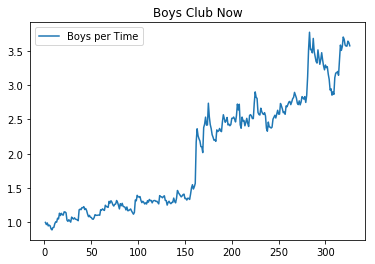

1.507770818835541
1.0047492781318825
2.8931466472901164
1.3827131417804996


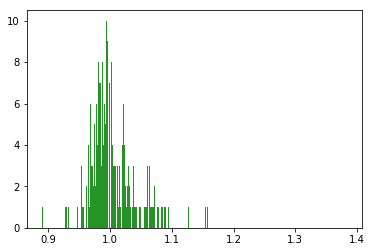

In [6]:
## just RSIalpha and PNL ##

alpha = 0.7
low = 30
high = 80
leverage = 25
df1 = pd.read_csv('1440.csv')
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close']) #close values 
lm = len(close)-1
lp = len(close)+1
l = len(close)
rsi_len = 15
## RSI CLOSE ##
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSIclose = pd.Series(np.zeros(l))

for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
        smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
        if smaloss[i] == 0:
            RSIclose[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])
j = 0
k = 0
price = np.zeros((l-15, 9))
#mat = np.zeros((20, 1200))
#pnl = 1;
#leverage = 10
f=0
d=0
for i in range(15, l):
    if (RSIclose[i] < low and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 4] = RSIclose[i]
    #elif  (RSIclose[i] < low and j>=1):    
    #    j = j + 1
    #    mat[j,k] = RSIclose[i]
    #elif RSIclose[i] >= low  and (RSIclose[i] <= high) and (j >= 1):
    ##    j = j + 1
     # #  mat[j,k] = RSIclose[i] 
    elif (RSIclose[i]>=high) and (j>=1):
        j = j+1
        #mat[j,k] = RSIclose[i]
        price[k, 5] = RSIclose[i]
        price[k, 3] = i;   
        price[k, 1] = close[i]
        price[k, 8] = (1-price[k,1]/price[k,0])*100
        k = k+1
        j = 0
       # d = 1

   # if price[k,4] == price[k,5]:
   #     p = price[k,5]+1
   #     price[k,5] = p
   #     price[k,1] = close[p]
  #  if (RSIclose[i] >= hiS and j == 0):
 #       j = 1
 #       price[k, 0] = close[i]
 #       price[k, 2] = 1
  #  elif (RSIclose[i] <= loS) and (j>=1):
    #    j = 0 
  #     k = k+1
  #  price[k, 1] = close[i];
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i+1] = 1*(1+(price[i,0]/price[i,1]-1)*leverage)
    pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*leverage)
    price[i, 7] = pnlT[i]
    price[i, 6] = pnl[i]
    if pnl[i+1] < 0.8:
       # pnlT[i+1] = 1
        print('No boys.')
plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
plt.title("Boys Club Now")
plt.legend()
plt.show()
#n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
#pdb.set_trace()
print(max(price[:,8]))
print(np.mean(pnl))
print(sp.stats.skew(pnl))
print(max(pnl))

In [125]:
np.set_printoptions(threshold=1000000)
print(price)

[[ 8.66400000e+03  8.66250000e+03  1.50000000e+01  1.80000000e+01
   0.00000000e+00  8.09554666e+01  1.00000000e+00  1.00000000e+00
   1.73130194e-02]
 [ 8.65250000e+03  8.65000000e+03  1.90000000e+01  2.70000000e+01
   2.35427433e+01  9.48583914e+01  1.01731602e+00  1.01731602e+00
   2.88933834e-02]
 [ 8.64500000e+03  8.63450000e+03  3.20000000e+01  4.10000000e+01
   2.20638639e+00  9.53097500e+01  1.02890173e+00  1.04671821e+00
   1.21457490e-01]
 [ 8.62500000e+03  8.63400000e+03  4.40000000e+01  4.50000000e+01
   8.44532824e+00  7.53464188e+01  1.12160519e+00  1.17400458e+00
  -1.04347826e-01]
 [ 8.63500000e+03  8.62150000e+03  4.80000000e+01  5.20000000e+01
   2.61155709e+01  7.77093523e+01  8.95760945e-01  1.05162745e+00
   1.56340475e-01]
 [ 8.63850000e+03  8.62700000e+03  6.50000000e+01  7.20000000e+01
   5.44291982e+00  8.22987343e+01  1.15658528e+00  1.21629683e+00
   1.33124964e-01]
 [ 8.62200000e+03  8.49200000e+03  7.30000000e+01  8.50000000e+01
   2.57757481e+01  8.1594631

In [50]:
sp.stats.skew(pnl)

2.0942088940419734

In [110]:
price[:,5]

array([80.37257091, 84.87879577, 70.90231099, ..., 90.97357711,
       76.78933176, 92.26714021])

In [78]:
print(price)

[[6.74300000e+03 6.74450000e+03 1.50000000e+01 ... 8.96713615e+01
  1.00000000e+00 1.00000000e+00]
 [6.73950000e+03 6.73400000e+03 1.70000000e+01 ... 9.36328952e+01
  9.98331974e-01 9.98331974e-01]
 [6.73000000e+03 6.73250000e+03 2.70000000e+01 ... 7.07220833e+01
  1.00612563e+00 1.00444739e+00]
 ...
 [9.37400000e+03 9.36600000e+03 4.34690000e+04 ... 8.35667021e+01
  9.93203625e-01 5.00318886e+01]
 [9.36500000e+03 9.35700000e+03 4.34820000e+04 ... 9.00130005e+01
  1.00640615e+00 5.03524003e+01]
 [9.35250000e+03 9.35900000e+03 4.34930000e+04 ... 9.19647031e+01
  0.00000000e+00 0.00000000e+00]]


In [80]:
np.set_printoptions(threshold=10)
print(price)

[[6.74300000e+03 6.74450000e+03 1.50000000e+01 ... 8.96713615e+01
  1.00000000e+00 1.00000000e+00]
 [6.73950000e+03 6.73400000e+03 1.70000000e+01 ... 9.36328952e+01
  9.98331974e-01 9.98331974e-01]
 [6.73000000e+03 6.73250000e+03 2.70000000e+01 ... 7.07220833e+01
  1.00612563e+00 1.00444739e+00]
 ...
 [9.37400000e+03 9.36600000e+03 4.34690000e+04 ... 8.35667021e+01
  9.93203625e-01 5.00318886e+01]
 [9.36500000e+03 9.35700000e+03 4.34820000e+04 ... 9.00130005e+01
  1.00640615e+00 5.03524003e+01]
 [9.35250000e+03 9.35900000e+03 4.34930000e+04 ... 9.19647031e+01
  0.00000000e+00 0.00000000e+00]]


In [ ]:
#print(close)

In [ ]:
print(RSIclose)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [ ]:
## "SHORT" ##
hi = 50
lo = 20
for i in range(15, l):
    if (RSIclose[i] > hi and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 4] = RSIclose[i]
    #elif  (RSIclose[i] < low and j>=1):    
    #    j = j + 1
    #    mat[j,k] = RSIclose[i]
    #elif RSIclose[i] >= low  and (RSIclose[i] <= high) and (j >= 1):
    ##    j = j + 1
     # #  mat[j,k] = RSIclose[i] 
    elif (RSIclose[i]<=lo) and (j>=1):
        j = j+1
        #mat[j,k] = RSIclose[i]
        price[k, 5] = RSIclose[i]
        price[k, 3] = i;   
        price[k, 1] = close[i]
        k = k+1
        j = 0
       # d = 1    
    
    

In [132]:
# 500 20000 test ##


df1 = pd.read_csv('boys.csv')
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close']) #close values
vwap = pd.Series(df_all['vwap']) #volume-weighted price average
lm = len(close)-1
lp = len(close)+1
l = len(close)
rsi_len = 15
## RSI CLOSE ##
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSIclose = pd.Series(np.zeros(l))
alpha = 0.04
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = (close[i]-close[i-1])/(close[i])
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
        smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
        if smaloss[i] == 0:
            RSIclose[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])
# j = 0
# k = 0
# price = np.zeros((l-15, 8))
# #mat = np.zeros((20, 1200))
# #pnl = 1;
# low = 10
# high = 30
# leverage = 10
# f=0
# d=0
# for i in range(15, l):
#     if (RSIclose[i] < low and j == 0):
#         j = 1
#         price[k, 0] = close[i]
#         price[k, 2] = i
#         price[k, 4] = RSIclose[i]
#     #elif  (RSIclose[i] < low and j>=1):    
#     #    j = j + 1
#     #    mat[j,k] = RSIclose[i]
#     #elif RSIclose[i] >= low  and (RSIclose[i] <= high) and (j >= 1):
#     ##    j = j + 1
#      # #  mat[j,k] = RSIclose[i] 
#     elif (RSIclose[i]>=high) and (j>=1):
#         j = j+1
#         #mat[j,k] = RSIclose[i]
#         price[k, 5] = RSIclose[i]
#         price[k, 3] = i;   
#         price[k, 1] = close[i]
#         k = k+1
#         j = 0
#        # d = 1

#    # if price[k,4] == price[k,5]:
#    #     p = price[k,5]+1
#    #     price[k,5] = p
#    #     price[k,1] = close[p]
#   #  if (RSIclose[i] >= hiS and j == 0):
#  #       j = 1
#  #       price[k, 0] = close[i]
#  #       price[k, 2] = 1
#   #  elif (RSIclose[i] <= loS) and (j>=1):
#     #    j = 0 
#   #     k = k+1
#   #  price[k, 1] = close[i];
# price = np.delete(price, np.s_[k::], 0)
# pnl = np.ones(len(price))
# pnlT = np.ones(len(price))
# for i in range(0, len(price)-1):
#     pnl[i] = (1+(price[i,0]/price[i,1]-1)*leverage)
#     pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*leverage)
#     price[i, 7] = pnlT[i]
#     price[i, 6] = pnl[i]
# plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
# plt.title("Boys Club Now")
# plt.legend()
# plt.show()
# #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
# n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
# #pdb.set_trace()

In [133]:

df1_20000 = pd.read_csv('20000.csv')
df_all10000 = pd.DataFrame(df1_20000)
df_all10000 = pd.DataFrame(df_all10000.values[::-1], df_all10000.index, df_all10000.columns) # turn around data

close10000 = pd.Series(df_all['close']) #close values
rsi_len = 15
## RSI CLOSE ##
change_close10000 = pd.Series(np.zeros(l))
gain10000 = pd.Series(np.zeros(l))
loss10000 = pd.Series(np.zeros(l))
smagain10000 = pd.Series(np.zeros(l))
smaloss10000 = pd.Series(np.zeros(l))
RS10000 = pd.Series(np.zeros(l))
RSIclose10000 = pd.Series(np.zeros(l))
alpha = 0.6
for i in range(1,len(close)):   
    #print(close[i])
    change_close10000[i] = (close10000[i]-close10000[i-1])/(close10000[i])
    if change_close10000[i] > 0:
        gain10000[i] = change_close10000[i]
    elif change_close[i] < 0:
        loss10000[i] = change_close10000[i]*-1
    elif change_close10000[i] == 0.00000:
        loss10000[i] = 0
        gain10000[i] = 0
    if i == rsi_len:   
        smagain10000[rsi_len] = gain10000[i-rsi_len:i].sum()/rsi_len
        smaloss10000[rsi_len] = loss10000[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain10000[i] = (1-alpha)*smagain10000[i-1]+(alpha)*gain[i]
        smaloss10000[i] = (1-alpha)*smaloss10000[i-1]+(alpha)*loss[i]
        if smaloss10000[i] == 0:
            RSIclose10000[i] = 100
        else:
            RS10000[i] = smagain10000[i]/smaloss10000[i]
            RSIclose10000[i] = 100 - 100/(1+RS10000[i])
p1 = len(RSIclose10000)-1
#p
print(RSIclose10000[(len(RSIclose10000)-1)])
print(RSIclose[(len(RSIclose)-1)])

4.845024410644214
4.845024410644214


In [11]:
pnl_alpha(0, 1000, '1000.csv', 0.7, 0, 100, 30, 50)

NameError: name 'pnl_alpha' is not defined

In [16]:
py 

NameError: name 'py' is not defined

In [6]:
from lib import bitmex

In [7]:
import settings

In [125]:
p1 = len(RSIclose10000)-1
print(p1)

20499


In [9]:
connector = bitmex.BitMEX(base_url=API_BASE)

In [15]:

connector = bitmex.BitMEX(base_url=API_BASE, apiKey=API_KEY, apiSecret=API_SECRET)

In [14]:
from settings import API_KEY, API_SECRET, API_BASE

In [20]:
from bitmex import bitmex.BitMEX

SyntaxError: invalid syntax (<ipython-input-20-565361ab2d8f>, line 1)

In [8]:
def pnl_only(alpha, name, low, high, leverage):
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = df_all['close'] #close values
    vwap = pd.Series(df_all['vwap']) #volume-weighted price average
    lm = len(close)-1
    lp = len(close)+1
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len:   
            smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len: 
            smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
            smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
            if smaloss[i] == 0:
                RSIclose[i] = 100
            else:
                RS[i] = smagain[i]/smaloss[i]
                RSIclose[i] = 100 - 100/(1+RS[i])
               #print(RSIclose[i])
    j = 0
    k = 0
    price = np.zeros((l-15, 9))
    #pnl = 1;
    f=0
    d=0
    for i in range(15, l):
        if (RSIclose[i] < low and j == 0):
            j = 1
            price[k, 0] = close[i]
            price[k, 2] = i
            price[k, 4] = RSIclose[i]
        elif (RSIclose[i]>=high) and (j>=1):
            j = j+1
            #mat[j,k] = RSIclose[i]
            price[k, 5] = RSIclose[i]
            price[k, 3] = i;   
            price[k, 1] = close[i]
            price[k, 8] = (1-price[k,1]/price[k,0])*100
            k = k+1
            j = 0
           # d = 1
    price = np.delete(price, np.s_[k::], 0)
    pnl = np.ones(len(price))
    pnlT = np.ones(len(price))
    for i in range(0, len(price)-1):
        pnl[i] = (1+(price[i,0]/price[i,1]-1)*leverage)
        pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*leverage)
        price[i, 3] = pnlT[i]
        price[i, 2] = pnl[i]
    plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
    plt.title("Boys Club Now")
    plt.legend()
    plt.show()
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    print(min(pnl))
    print(np.mean(pnl))
    print(len(close))
    #pdb.set_trace()

In [18]:
pnl_only

<function __main__.pnl_only(alpha, name, low, high, leverage)>

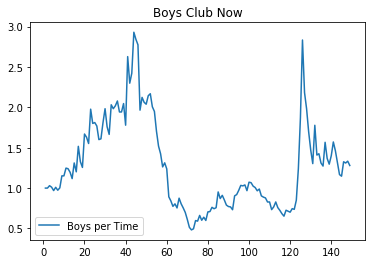

0.7084048027444214
1.0096472636041096
1000


In [10]:
pnl_only(0.7, 'boys.csv', 30, 50, 100)